The data can be found here: https://www.kaggle.com/datasets/brsdincer/star-type-classification


For comparing all models of ML
It can be used for prediction

Temperature -- K
L -- L/Lo
R -- R/Ro
AM -- Mv
Color -- General Color of Spectrum
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

TARGET:
Type

from 0 to 5

Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5
MATH:

Lo = 3.828 x 10^26 Watts
(Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m
(Avg Radius of Sun)

In [72]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Import Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#                                 Explanatory data analysis part

In [3]:
Stars = pd.read_csv('Stars.csv')
type_mapping = {
    0: "Red Dwarf",
    1: "Brown Dwarf",
    2: "White Dwarf",
    3: "Main Sequence",
    4: "Super Giants",
    5: "Hyper Giants"
}

# Apply the mapping function to create the new 'New_Type' column
Stars['Type2'] = Stars['Type'].map(type_mapping)
Stars.head(100)

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Type2
0,3068,0.002400,0.1700,16.12,Red,M,0,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,0,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,0,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,0,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,0,Red Dwarf
...,...,...,...,...,...,...,...,...
95,11250,672.000000,6.9800,-2.30,Blue-white,A,3,Main Sequence
96,5112,0.630000,0.8760,4.68,Orange-Red,K,3,Main Sequence
97,7720,7.920000,1.3400,2.44,yellow-white,F,3,Main Sequence
98,12098,689.000000,7.0100,0.02,Blue-white,A,3,Main Sequence


In [4]:
Stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
 7   Type2           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [5]:
Stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


**Data visualisations section**

In [6]:
sns.set_theme(style="dark")
plt.style.use('dark_background')

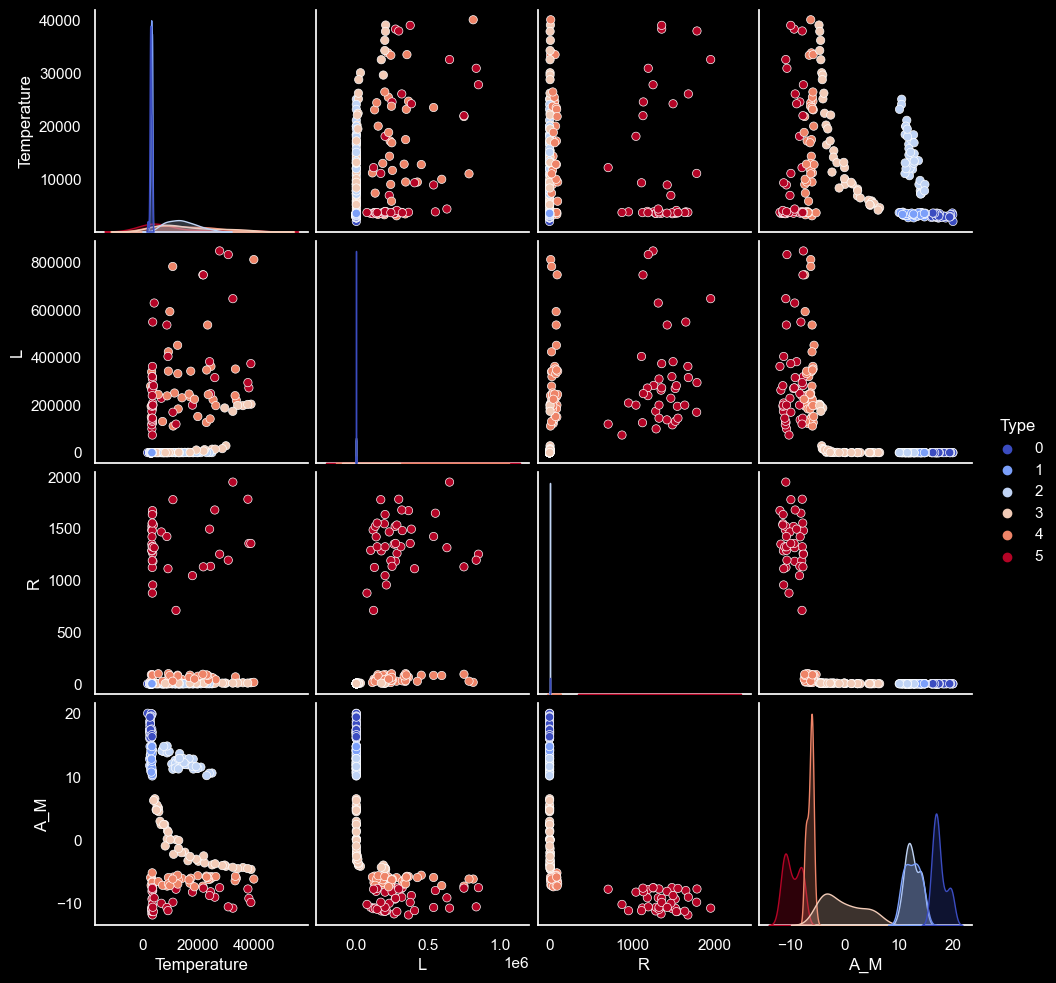

In [7]:
sns.pairplot(Stars,hue='Type',palette='coolwarm')

<Axes: xlabel='Temperature', ylabel='L'>

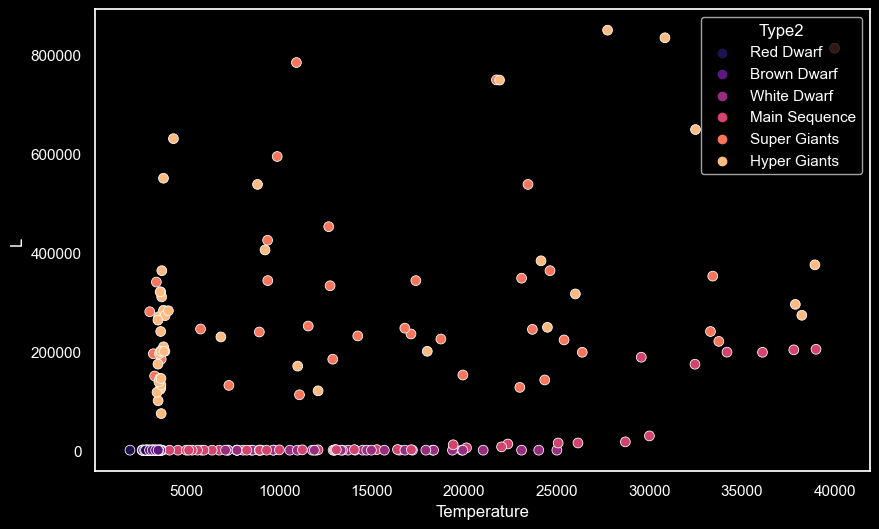

In [8]:

f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=Stars['Temperature'], y=Stars['L'], s=50, hue=Stars['Type2'], color=".15",palette='magma')



<Axes: xlabel='Temperature', ylabel='L'>

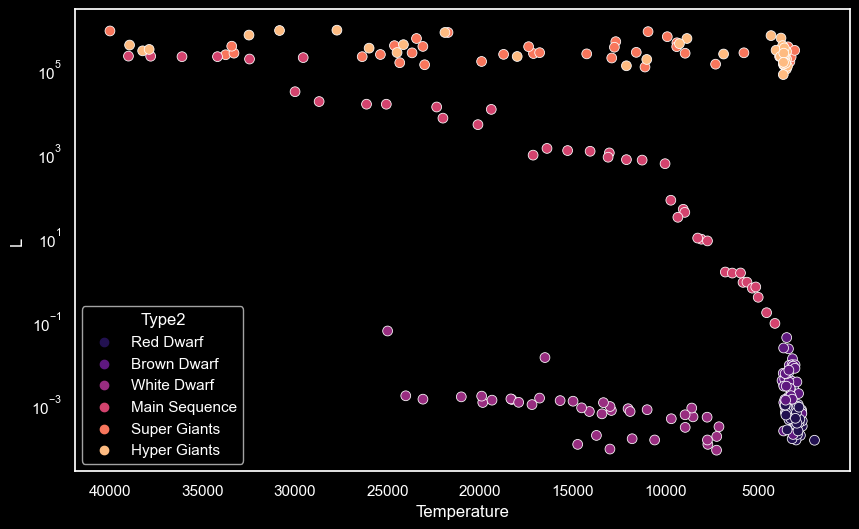

In [9]:
# Making the HR diagram

f, ax = plt.subplots(figsize=(10, 6))
plt.yscale('log')
ax.invert_xaxis()

sns.scatterplot(x=Stars['Temperature'], y=Stars['L'], s=50, hue=Stars['Type2'], palette='magma')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Red'),
  Text(1, 0, 'Blue White'),
  Text(2, 0, 'White'),
  Text(3, 0, 'Yellowish White'),
  Text(4, 0, 'Blue white'),
  Text(5, 0, 'Pale yellow orange'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'Blue-white'),
  Text(8, 0, 'Whitish'),
  Text(9, 0, 'yellow-white'),
  Text(10, 0, 'Orange'),
  Text(11, 0, 'White-Yellow'),
  Text(12, 0, 'white'),
  Text(13, 0, 'yellowish'),
  Text(14, 0, 'Yellowish'),
  Text(15, 0, 'Orange-Red'),
  Text(16, 0, 'Blue-White')])

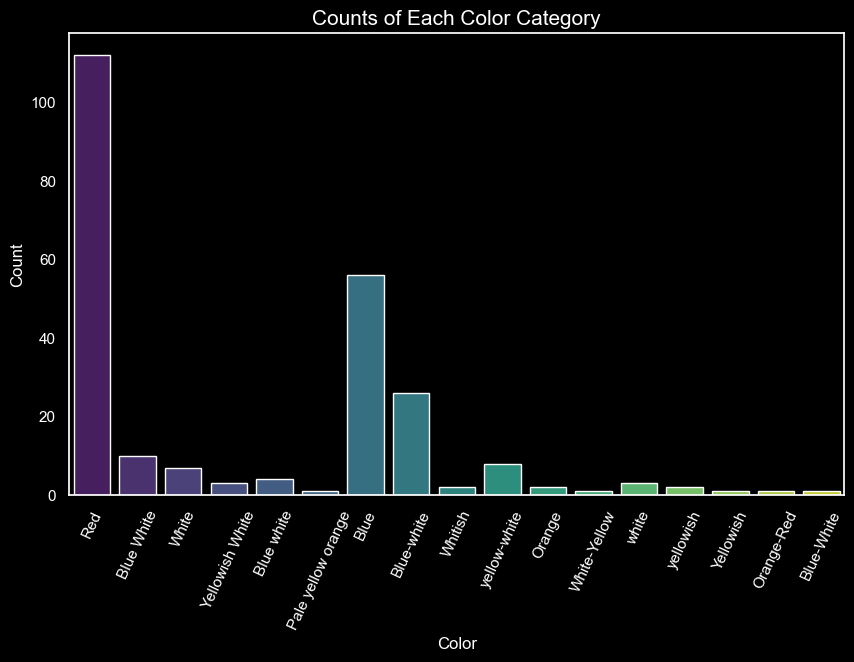

In [10]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(data=Stars, x='Color', palette='viridis')  # Create the countplot

plt.xlabel('Color', fontsize=12)  # Set the x-axis label
plt.ylabel('Count', fontsize=12)  # Set the y-axis label
plt.title('Counts of Each Color Category', fontsize=15)  # Set the plot title


plt.xticks(rotation=65)


Text(0.5, 1.0, 'Heatmap of Dataset')

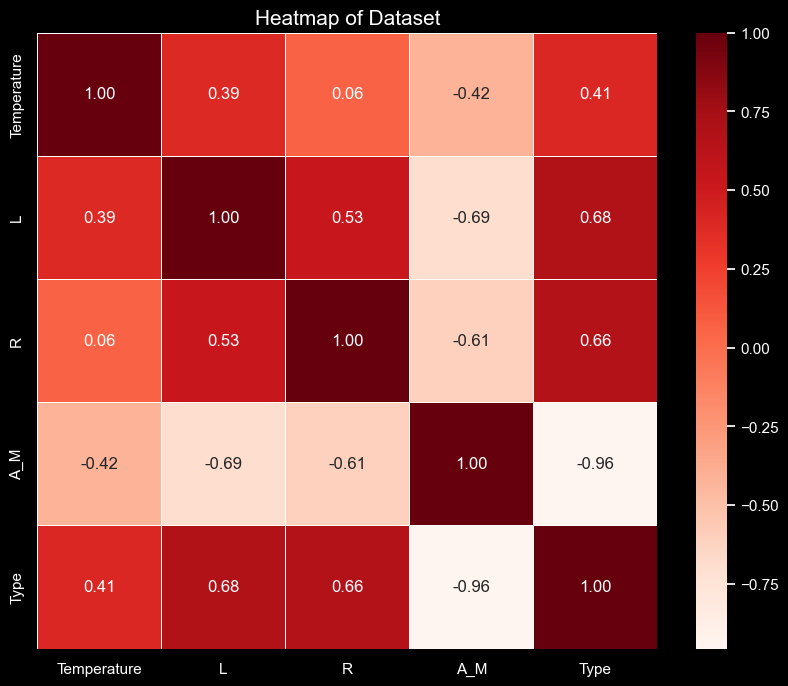

In [11]:
# Create a heatmap of the dataset
plt.figure(figsize=(10, 8))  # Set the figure size

# Select the relevant columns for the heatmap (you can adjust this as needed)
heatmap_data = Stars[['Temperature', 'L', 'R', 'A_M','Type']]

# Create the heatmap
sns.heatmap(heatmap_data.corr(), annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)

plt.title('Heatmap of Dataset', fontsize=15)  # Set the plot title

#                                 Machine Learning section

Create a new Dataframe called T that contains the numerical values we will use for the train-split-test part

In [19]:

T = Stars.copy()


T = pd.get_dummies(T, columns=['Color', 'Spectral_Class','Type'], drop_first=True)
D = Stars['Type']


selected_features = ['Temperature', 'L', 'R','A_M']
T = T[selected_features]

scaler = StandardScaler()
T[selected_features] = scaler.fit_transform(T[selected_features])

T.head()

,Temperature,L,R,A_M
0,-0.779382,-0.598624,-0.459210,1.116745
1,-0.782110,-0.598624,-0.459241,1.162414
2,-0.828477,-0.598624,-0.459342,1.362213
3,-0.807496,-0.598624,-0.459229,1.167171
4,-0.897819,-0.598624,-0.459340,1.491607


Train-split-test part using KNN

In [67]:
T_train, T_test, D_train, D_test = train_test_split(T,D,
                                                    test_size=0.2)

In [68]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(T_train,D_train)

KNeighborsClassifier(n_neighbors=11)

In [69]:
pred = knn.predict(T_test)

print(confusion_matrix(D_test,pred))
print(classification_report(D_test,pred))

[[9 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 3 4 0]
 [0 0 0 2 6 0]
 [0 0 0 0 0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         9
           3       0.60      0.43      0.50         7
           4       0.60      0.75      0.67         8
           5       1.00      1.00      1.00         9

    accuracy                           0.88        48
   macro avg       0.87      0.86      0.86        48
weighted avg       0.88      0.88      0.87        48



Choosing the best value for K

In [70]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(T_train,D_train)
    pred_i = knn.predict(T_test)
    error_rate.append(np.mean(pred_i != D_test))

Text(0, 0.5, 'Error Rate')

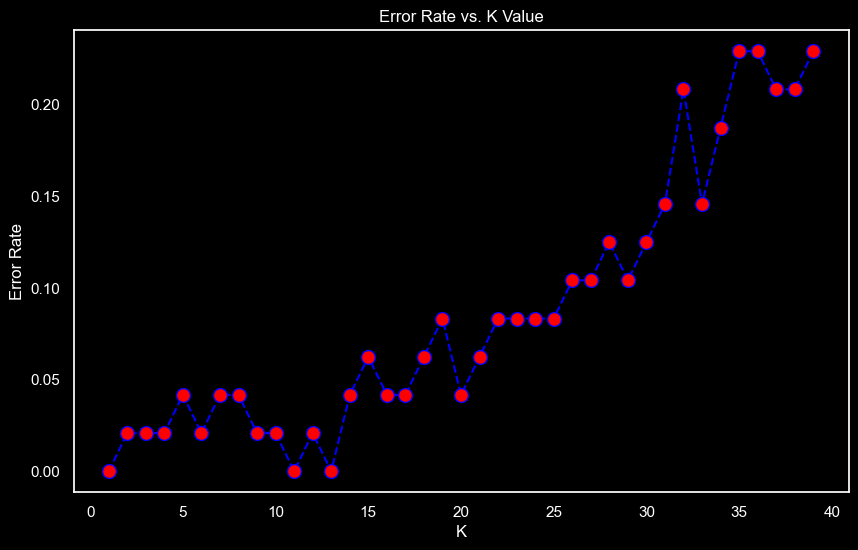

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')